# yFinance
Is an open source library that use Python and allows to analyse finance data.

Documentation of yFinance: https://github.com/ranaroussi/yfinance

## Problem 1: Data from yfinance
Using the yfinance Python package, and a function called 'get_data()' we will downloads all hourly data for the previous five days for the five FAANG stocks.
This function should save the data into a folder called 'data' that is in the root of this repository using a filename with the format YYYYMMDD-HHmmss.csv

### 1.1 Preparing the environment
First, we must prepare the necessary working environment for the first problem. This introductory section is divided as follows:
- Library installation.
- Functionality test, using only one company (Microsoft).
- Verified company information.
- Use multiple tickers (FAANG) to obtain information, including a 5-day history.

To run the program we need to import necessary libraries, like yfinance, pandas and datetime.

In [1]:
# install yfinance
'''we use the symbol % in jupyter notebooks, to avoid issues of syntaxis'''
%pip install yfinance



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# yahoo Finance data
import yfinance as yf

# import DataFrames
import pandas as pd

# import dates and times
import datetime as dt

# import Os for files in directory
import os 

# import matplotlib for plotting
import matplotlib.pyplot as plt


We can verify if the libraries are imported correctly to get some data. We will get data of one company [Microsoft]

In [3]:
# Get the data for Microsoft
dat = yf.Ticker("MSFT")

In [4]:
# Verify the data.
dat

yfinance.Ticker object <MSFT>

We can have some information of Microsoft, using 'dat.info'

In [5]:
dat.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consu

Having verified that our code works, we can begin to have the data of the five FAANG stocks. Using multiple tickers.

In [6]:
# Multiple tickers.

tickers = yf.Tickers ('META, AAPL, AMZN, NFLX, GOOG')

# Show tickers.
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [7]:
# Get history data of the last 5 days
dat.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-05 00:00:00-05:00,482.519989,483.399994,478.880005,483.160004,22608700,0.0,0.0
2025-12-08 00:00:00-05:00,484.890015,492.299988,484.380005,491.019989,21965900,0.0,0.0
2025-12-09 00:00:00-05:00,489.100006,492.119995,488.500000,492.019989,14696100,0.0,0.0
2025-12-10 00:00:00-05:00,484.029999,484.250000,475.079987,478.559998,35756200,0.0,0.0
2025-12-11 00:00:00-05:00,476.559998,486.029999,475.859985,484.649994,15418558,0.0,0.0


### 1.1.2 Downdload Data
Using yf.download to retrieve historical data for multiple tickers at once. 
Returns a pandas DataFrame with a MultiIndex columns (like: attribute, ticker).

Link:

In [8]:
# Get historical data for multiple tickers at once.

yf.download (["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')

/tmp/ipykernel_36279/958711071.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download (["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-12-05  278.779999  229.529999  321.879974  673.419983  100.239998   
2025-12-08  277.890015  226.889999  314.450012  666.799988   96.790001   
2025-12-09  277.179993  227.919998  317.750000  656.960022   96.709999   
2025-12-10  278.779999  231.779999  321.000000  650.130005   92.709999   
2025-12-11  278.109985  229.600006  313.364990  650.979980   94.019897   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-12-05  281.140015  231.240005  323.618830  674.690002  104.790001  ...   
2025-12-08  279.670013  230.830002  321.230011  676.710022   99.889999  ...   
2025-12-09  280.029999  228.570007  318.709015  664.479980   97.239998  ...   
2025-12-10  279.750000  232.419998  321.869995  654.510010   96.970001  ...   
2025-12-11  279.579987  232.110001  321.989990  655.280029   94.820000  ...   

Price             Open                                                 \
Ticker            AAPL        AMZN        GOOG        META       NFLX   
Date                                                                    
2025-12-05  280.540009  230.320007  319.791341  664.000000  98.779999   
2025-12-08  278.130005  229.589996  321.029999  669.340027  99.870003   
2025-12-09  278.160004  226.839996  313.100006  663.770020  97.029999   
2025-12-10  277.750000  228.809998  316.619995  649.950012  96.739998   
2025-12-11  279.095001  230.710007  320.940002  642.729980  93.855003   

Price         Volume                                           
Ticker          AAPL      AMZN      GOOG      META       NFLX  
Date                                                           
2025-12-05  47265800  33117400  15719900  21207900  133363600  
2025-12-08  38211800  35019200  22006900  13161000  100906300  
2025-12-09  32193300  25841700  14151300  12997100   51745600  
2025-12-10  33038300  38790700  22764500  16910900   74129300  
2025-12-11  22252935  19177592  16786213   8975417   34583426  

[5 rows x 25 columns]

Assign the downloaded historical data to the df variable

Returns a pandas DataFrame

In [9]:
# Download historical data to 'df' 
df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')

/tmp/ipykernel_36279/621637818.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d')
[*********************100%***********************]  5 of 5 completed


In [10]:
# Displays the columns of the DataFrame
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

The index is a DatetimeIndex representing the observation timestamps. Practically index based on dates and times.

Source: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [11]:
# Show the index
df.index

DatetimeIndex(['2025-12-05', '2025-12-08', '2025-12-09', '2025-12-10',
               '2025-12-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

### 1.1.3 Date and Times
As part of the program, we need to download all hourly data for the last five days for the five FAANG stocks.
For that we will use the module that provides classes to manipulate dates and times.
https://docs.python.org/3/library/datetime.html


In [12]:
'''To have a cleaner structure, the data frame module was added to the beginning of the code along with the other libraries.'''
# import datetime as dt 

'To have a cleaner structure, the data frame module was added to the beginning of the code along with the other libraries.'

In [13]:
# Importing datetime module, to manipulate dates and times.
# To get the current date and time.
now = dt.datetime.now()

# Show.
now

datetime.datetime(2025, 12, 11, 20, 26, 34, 920581)

Format to the data and time. We can use 'now.strftime' and specify the format of day, months, year and time.
Resource: https://docs.python.org/3.6/library/date

In [14]:
# Format date and time.
now.strftime("%Y%m%d-%H%M%S")

'20251211-202634'

### 1.1.4 File name and Save file
Part of the task is to assign to each created CSV a name composed by date and time, following the format: YYMMDD and HHMMSS, and save the CVS genarated every time that the program get ejecuted, to a dictionary called "data".

In [15]:
# File name.
"data/" + now.strftime("%Y%m%d-%H%M%S") + ".csv"

'data/20251211-202634.csv'

In [16]:
# Save data as CSV.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

df.to_csv("data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv")

## 1.2 Function 'get_data()'

The get_data() function downloads all hourly data for the previous five days for the five FAANG stocks and save the data into a directory called 'data' in the root of this repository using a filename with the format YYYYMMDD-HHmmss.csv
Save data in a directory: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories

In [17]:
def get_data():
    '''Download the FAANG hourly for the last 5 days and save it in a folder called (data)'''
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

    # Download hourly prices for the past 5 days
    df = yf.download(tickers, period="5d", interval="1h")
    
    
    # Save data as CSV
    # Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
    data_dir = "data"
    os.makedirs(data_dir, exist_ok=True) #This create a directory if doesn't exist

    '''Format to the data and time. We can use 'now.strftime'''
    # File name with format date and time.
    filename = dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
    filename_time = f"{data_dir}/{filename}"

    '''The return keyword is to exit a function and return a value. Source: https://www.w3schools.com/python/ref_keyword_return.asp'''
    df.to_csv(filename_time)
    return df, filename_time


In [18]:
'''Test if the function works'''
# Download hourly prices for the past 5 days
df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')

# Show data.
get_data

/tmp/ipykernel_36279/3852351785.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')


[*********************100%***********************]  5 of 5 completed


<function __main__.get_data()>

In [19]:
# show the index including time
df.index

DatetimeIndex(['2025-12-05 14:30:00+00:00', '2025-12-05 15:30:00+00:00',
               '2025-12-05 16:30:00+00:00', '2025-12-05 17:30:00+00:00',
               '2025-12-05 18:30:00+00:00', '2025-12-05 19:30:00+00:00',
               '2025-12-05 20:30:00+00:00', '2025-12-08 14:30:00+00:00',
               '2025-12-08 15:30:00+00:00', '2025-12-08 16:30:00+00:00',
               '2025-12-08 17:30:00+00:00', '2025-12-08 18:30:00+00:00',
               '2025-12-08 19:30:00+00:00', '2025-12-08 20:30:00+00:00',
               '2025-12-09 14:30:00+00:00', '2025-12-09 15:30:00+00:00',
               '2025-12-09 16:30:00+00:00', '2025-12-09 17:30:00+00:00',
               '2025-12-09 18:30:00+00:00', '2025-12-09 19:30:00+00:00',
               '2025-12-09 20:30:00+00:00', '2025-12-10 14:30:00+00:00',
               '2025-12-10 15:30:00+00:00', '2025-12-10 16:30:00+00:00',
               '2025-12-10 17:30:00+00:00', '2025-12-10 18:30:00+00:00',
               '2025-12-10 19:30:00+00:00', '2025-1

In [20]:
# Print data as CSV.

print(df.to_csv())

Price,Close,Close,Close,Close,Close,High,High,High,High,High,Low,Low,Low,Low,Low,Open,Open,Open,Open,Open,Volume,Volume,Volume,Volume,Volume
Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2025-12-05 14:30:00+00:00,280.4551086425781,230.9384002685547,322.4649963378906,670.9849853515625,104.66500091552734,281.1400146484375,231.1699981689453,323.8299865722656,673.5,104.7300033569336,279.2699890136719,229.80999755859375,320.0,662.4149780273438,97.73999786376953,280.5400085449219,230.3800048828125,320.0,664.5,98.69000244140625,4393145,4965629,3363481,3614338,29574869
2025-12-05 15:30:00+00:00,279.2950134277344,229.6739959716797,320.8789978027344,668.6500244140625,100.5199966430664,280.9800109863281,231.24000549316406,322.75,673.0,104.79000091552734,279.2900085449219,229.4499969482422,319.9849853515625,667.6500244140625,100.43000030517578,280.4599914550781,230.94000244140625

## Problem 2: Plots
The function plot_data() opens the latest data file in the data folder and plots the Close prices for each of the five stocks. 
The plot include axis labels, a legend, and the date as a title. 
The function save the plot into a plots folder in the root of this repository using a filename in the format YYYYMMDD-HHmmss.png.

### 2.1 Preparing the environment
First, we must prepare the necessary working environment for the second problem. This introductory section is divided as follows:
- Import matploplib (For a better reading of the code, it was added at the begining of the notebook).
- Check the columns we have in the Data frame.
- Preparing the enviroment, using 'plot()' function, and plot all columns in the data frame of all the companies.
- Check the closing price of one company (Apple) and plot it.
- Check the closing price of FAANG and plot them.

We can check the columns we have in the Data frame.

In [21]:
# List of columns of df
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

Test if we can plot, only using the 'plot()' function

<Axes: xlabel='Datetime'>

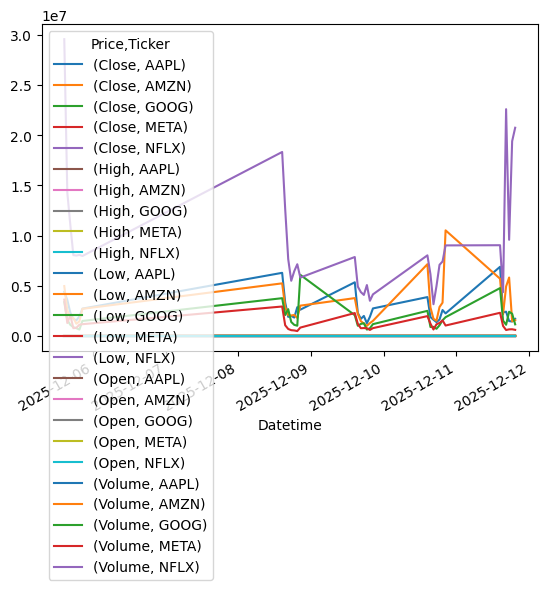

In [22]:
# Plot all the columns for all FAANG
# Xlabel it's the 'Datetime'
df.plot()

As the task request to plot the close price, first we will test the closing time only for one of the companies. 

<Axes: xlabel='Datetime'>

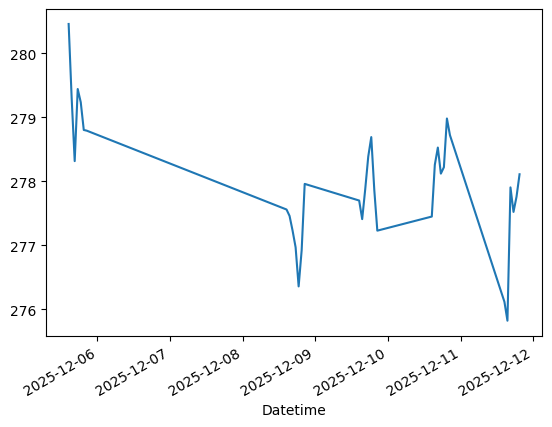

In [23]:
# Plot closing price of Apple.
df[('Close', 'AAPL')].plot()


In [24]:
# Display the 'Close' column for FAANG
df['Close']

Ticker,AAPL,AMZN,GOOG,META,NFLX
Datetime,,,,,
2025-12-05 14:30:00+00:00,280.455109,230.938400,322.464996,670.984985,104.665001
2025-12-05 15:30:00+00:00,279.295013,229.673996,320.878998,668.650024,100.519997
2025-12-05 16:30:00+00:00,278.315002,229.389999,321.850006,673.638000,99.949997
2025-12-05 17:30:00+00:00,279.440002,229.839996,321.660004,672.000000,99.684998
2025-12-05 18:30:00+00:00,279.233795,229.675003,321.075012,672.539978,100.375000
2025-12-05 19:30:00+00:00,278.801392,229.259995,321.040009,672.710022,100.610001
2025-12-05 20:30:00+00:00,278.790009,229.550003,322.059998,673.460022,100.230003
2025-12-08 14:30:00+00:00,277.559998,229.039993,317.950012,668.773499,95.825302
2025-12-08 15:30:00+00:00,277.459991,228.070007,315.869385,669.838013,95.925003


<Axes: xlabel='Datetime'>

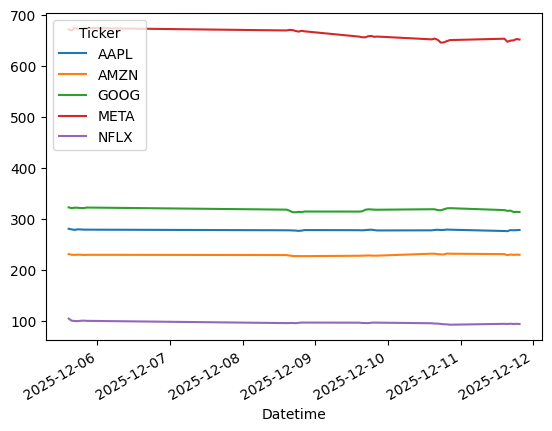

In [25]:
# Test, plot closing price of FAANG.
df[('Close')].plot()

### 2.1.2 Get and sort the files
We need to list the files, to know what's the recent one. For that we can list the files by order.
Source: https://docs.python.org/3/library/os.html

In [26]:
# list the files in the data folder
data_files = os.listdir('./data/')

# show data files 
data_files

['20251211-194113.csv',
 '20251208-161128.csv',
 '20251104-215921.csv',
 '20251207-171630.csv',
 '20251208-150808.csv',
 '20251210-205647.csv',
 '20251210-203811.csv',
 '20251210-011744.csv',
 '20251108-154055.csv',
 '20251210-203053.csv',
 '20251207-163839.csv',
 '20251108-152600.csv',
 '20251211-202403.csv',
 '20251207-225247.csv',
 '20251207-195029.csv',
 '20251211-201940.csv',
 '20251210-203921.csv',
 '20251116-235802.csv',
 '20251210-203651.csv',
 '20251104-215932.csv',
 '20251208-121953.csv',
 '20251211-152906.csv',
 '20251208-160827.csv',
 '20251116-230805.csv',
 '20251210-201458.csv',
 '20251207-215657.csv',
 '20251211-202635.csv',
 '20251207-163707.csv']

The previous list is not in order, and as the program need the most recent file, we will use here sorted() built-in function that builds a new sorted list from an iterable.
https://docs.python.org/3/howto/sorting.html

In [27]:
# Sort the list of files.
# Showing the most recent file at the top.
sorted(data_files, reverse=True)

['20251211-202635.csv',
 '20251211-202403.csv',
 '20251211-201940.csv',
 '20251211-194113.csv',
 '20251211-152906.csv',
 '20251210-205647.csv',
 '20251210-203921.csv',
 '20251210-203811.csv',
 '20251210-203651.csv',
 '20251210-203053.csv',
 '20251210-201458.csv',
 '20251210-011744.csv',
 '20251208-161128.csv',
 '20251208-160827.csv',
 '20251208-150808.csv',
 '20251208-121953.csv',
 '20251207-225247.csv',
 '20251207-215657.csv',
 '20251207-195029.csv',
 '20251207-171630.csv',
 '20251207-163839.csv',
 '20251207-163707.csv',
 '20251116-235802.csv',
 '20251116-230805.csv',
 '20251108-154055.csv',
 '20251108-152600.csv',
 '20251104-215932.csv',
 '20251104-215921.csv']

To get the last file (the most recent file) we can use the index

In [28]:
# Get the most recent file
data_files[0]

'20251211-194113.csv'

### 2.1.3 Read the files
Using Pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [29]:
df.info

<bound method DataFrame.info of Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   
2025-12-05 17:30:00+00:00  279.440002  229.839996  321.660004  672.000000   
2025-12-05 18:30:00+00:00  279.233795  229.675003  321.075012  672.539978   
2025-12-05 19:30:00+00:00  278.801392  229.259995  321.040009  672.710022   
2025-12-05 20:30:00+00:00  278.790009  229.550003  322.059998  673.460022   
2025-12-08 14:30:00+00:00  277.559998  229.039993  317.950012  668.773499   
2025-12-08 15:30:00+00:00  277.459991  228.070007  315.869385  669.838013   
2025-12-08 16:30:00+00:00  277.230011  227.2

In [30]:
# read the csv file
df = pd.read_csv(f'data/{data_files[0]}')

# show
df

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-05,278.7799987792969,229.52999877929688,321.8799743652344,673.4199829101562,100.23999786376953,281.1400146484375,231.24000549316406,323.61883002174113,674.6900024414062,...,280.5400085449219,230.32000732421875,319.79134083015884,664.0,98.77999877929688,47265800,33117400,15719900,21207900,133363600
3,2025-12-08,277.8900146484375,226.88999938964844,314.45001220703125,666.7999877929688,96.79000091552734,279.6700134277344,230.8300018310547,321.2300109863281,676.7100219726562,...,278.1300048828125,229.58999633789062,321.0299987792969,669.3400268554688,99.87000274658203,38211800,35019200,22006900,13161000,100906300
4,2025-12-09,277.17999267578125,227.9199981689453,317.75,656.9600219726562,96.70999908447266,280.0299987792969,228.57000732421875,318.7090148925781,664.47998046875,...,278.1600036621094,226.83999633789062,313.1000061035156,663.77001953125,97.02999877929688,32193300,25841700,14151300,12997100,51745600
5,2025-12-10,278.7799987792969,231.77999877929688,321.0,650.1300048828125,92.70999908447266,279.75,232.4199981689453,321.8699951171875,654.510009765625,...,277.75,228.80999755859375,316.6199951171875,649.9500122070312,96.73999786376953,33038300,38790700,22764500,16910900,74129300
6,2025-12-11,277.9800109863281,229.77999877929688,313.9110107421875,652.27001953125,94.21499633789062,279.5799865722656,232.11000061035156,321.989990234375,655.280029296875,...,279.0950012207031,230.7100067138672,320.94000244140625,642.72998046875,93.8550033569336,20097199,16801021,15487382,7822575,31283513


We can see there are rows that we don't need and can be difficult to read to plot the closing price. Therefore we can ignore them.
'Explicitly pass header=0 to be able to replace existing names'. 
Source: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [31]:
# Read the CSV file.
df = pd.read_csv(f'data/{data_files[0]}', header=[0, 1], index_col=0, parse_dates=True)

# Show.
df

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-12-05  278.779999  229.529999  321.879974  673.419983  100.239998   
2025-12-08  277.890015  226.889999  314.450012  666.799988   96.790001   
2025-12-09  277.179993  227.919998  317.750000  656.960022   96.709999   
2025-12-10  278.779999  231.779999  321.000000  650.130005   92.709999   
2025-12-11  277.980011  229.779999  313.911011  652.270020   94.214996   

Price             High                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2025-12-05  281.140015  231.240005  323.618830  674.690002  104.790001  ...   
2025-12-08  279.670013  230.830002  321.230011  676.710022   99.889999  ...   
2025-12-09  280.029999  228.570007  318.709015  664.479980   97.239998  ...   
2025-12-10  279.750000  232.419998  321.869995  654.510010   96.970001  ...   
2025-12-11  279.579987  232.110001  321.989990  655.280029   94.820000  ...   

Price             Open                                                 \
Ticker            AAPL        AMZN        GOOG        META       NFLX   
Date                                                                    
2025-12-05  280.540009  230.320007  319.791341  664.000000  98.779999   
2025-12-08  278.130005  229.589996  321.029999  669.340027  99.870003   
2025-12-09  278.160004  226.839996  313.100006  663.770020  97.029999   
2025-12-10  277.750000  228.809998  316.619995  649.950012  96.739998   
2025-12-11  279.095001  230.710007  320.940002  642.729980  93.855003   

Price         Volume                                           
Ticker          AAPL      AMZN      GOOG      META       NFLX  
Date                                                           
2025-12-05  47265800  33117400  15719900  21207900  133363600  
2025-12-08  38211800  35019200  22006900  13161000  100906300  
2025-12-09  32193300  25841700  14151300  12997100   51745600  
2025-12-10  33038300  38790700  22764500  16910900   74129300  
2025-12-11  20097199  16801021  15487382   7822575   31283513  

[5 rows x 25 columns]

In [ ]:
'''The row index displays the datetime, now.'''
# Showing the row index.

df.index


DatetimeIndex(['2025-12-05', '2025-12-08', '2025-12-09', '2025-12-10',
               '2025-12-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

## Save Plot

Sources: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<Axes: xlabel='Date'>

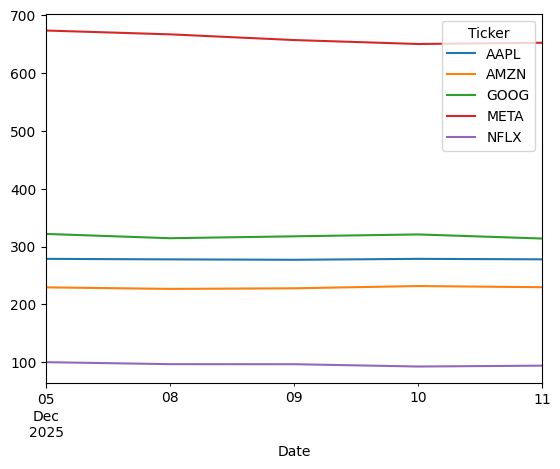

In [33]:
'''test to save the plot'''

# Create new figure and axis
fig, ax = plt.subplots()

# Plot all closing prices
df['Close'].plot(ax=ax)

# Save fig
#fig.savefig('./plots/test.png')


### 2.1 save the plot with timestamp

In [34]:
'''
# To get the current date and time.
now = dt.datetime.now()

# Format date and time.
now.strftime("%Y%m%d-%H%M%S")

# File name.
filename_plot = "../plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save fig
fig.savefig(filename_plot)
'''

'\n# To get the current date and time.\nnow = dt.datetime.now()\n\n# Format date and time.\nnow.strftime("%Y%m%d-%H%M%S")\n\n# File name.\nfilename_plot = "../plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"\n\n# Save fig\nfig.savefig(filename_plot)\n'

In [35]:
# list the files in the data folder
data_files = os.listdir('./data/')

# show data files 
data_files

['20251211-194113.csv',
 '20251208-161128.csv',
 '20251104-215921.csv',
 '20251207-171630.csv',
 '20251208-150808.csv',
 '20251210-205647.csv',
 '20251210-203811.csv',
 '20251210-011744.csv',
 '20251108-154055.csv',
 '20251210-203053.csv',
 '20251207-163839.csv',
 '20251108-152600.csv',
 '20251211-202403.csv',
 '20251207-225247.csv',
 '20251207-195029.csv',
 '20251211-201940.csv',
 '20251210-203921.csv',
 '20251116-235802.csv',
 '20251210-203651.csv',
 '20251104-215932.csv',
 '20251208-121953.csv',
 '20251211-152906.csv',
 '20251208-160827.csv',
 '20251116-230805.csv',
 '20251210-201458.csv',
 '20251207-215657.csv',
 '20251211-202635.csv',
 '20251207-163707.csv']

In [36]:
# sort the list of files
data_files.sort(reverse=True)

# show 
data_files


['20251211-202635.csv',
 '20251211-202403.csv',
 '20251211-201940.csv',
 '20251211-194113.csv',
 '20251211-152906.csv',
 '20251210-205647.csv',
 '20251210-203921.csv',
 '20251210-203811.csv',
 '20251210-203651.csv',
 '20251210-203053.csv',
 '20251210-201458.csv',
 '20251210-011744.csv',
 '20251208-161128.csv',
 '20251208-160827.csv',
 '20251208-150808.csv',
 '20251208-121953.csv',
 '20251207-225247.csv',
 '20251207-215657.csv',
 '20251207-195029.csv',
 '20251207-171630.csv',
 '20251207-163839.csv',
 '20251207-163707.csv',
 '20251116-235802.csv',
 '20251116-230805.csv',
 '20251108-154055.csv',
 '20251108-152600.csv',
 '20251104-215932.csv',
 '20251104-215921.csv']

In [37]:
# get the next file
data_files[0]

'20251211-202635.csv'

# Reading a file
Using Pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [38]:
# read the csv file
df = pd.read_csv(f'./data/{data_files[0]}')

# show
df

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-05,278.7799987792969,229.52999877929688,321.8799743652344,673.4199829101562,100.23999786376953,281.1400146484375,231.24000549316406,323.61883002174113,674.6900024414062,...,280.5400085449219,230.32000732421875,319.79134083015884,664.0,98.77999877929688,47265800,33117400,15719900,21207900,133363600
3,2025-12-08,277.8900146484375,226.88999938964844,314.45001220703125,666.7999877929688,96.79000091552734,279.6700134277344,230.8300018310547,321.2300109863281,676.7100219726562,...,278.1300048828125,229.58999633789062,321.0299987792969,669.3400268554688,99.87000274658203,38211800,35019200,22006900,13161000,100906300
4,2025-12-09,277.17999267578125,227.9199981689453,317.75,656.9600219726562,96.70999908447266,280.0299987792969,228.57000732421875,318.7090148925781,664.47998046875,...,278.1600036621094,226.83999633789062,313.1000061035156,663.77001953125,97.02999877929688,32193300,25841700,14151300,12997100,51745600
5,2025-12-10,278.7799987792969,231.77999877929688,321.0,650.1300048828125,92.70999908447266,279.75,232.4199981689453,321.8699951171875,654.510009765625,...,277.75,228.80999755859375,316.6199951171875,649.9500122070312,96.73999786376953,33038300,38790700,22764500,16910900,74129300
6,2025-12-11,278.1099853515625,229.60000610351562,313.3699951171875,650.97998046875,94.0199966430664,279.5799865722656,232.11000061035156,321.989990234375,655.280029296875,...,279.0950012207031,230.7100067138672,320.94000244140625,642.72998046875,93.8550033569336,22254126,19177691,16786697,8975417,34584103


In [39]:
df['Close']

0                  AAPL
1                   NaN
2     278.7799987792969
3     277.8900146484375
4    277.17999267578125
5     278.7799987792969
6     278.1099853515625
Name: Close, dtype: object